In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_pose = mp.solutions.pose

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def Detected_And_Draw(img,ID_list):



    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.8) as pose:
        results = pose.process(img)
        final_img = mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) ) 

    

    

        return final_img

In [7]:
cap = cv2.VideoCapture('data\\5.mp4')


while cap.isOpened():

            ret, frame = cap.read()
            height, width = frame.shape[:2]
       
            if not ret:
                break

            final_result = Detected_And_Draw(frame,(12,14,16))

            cv2.imshow('feed',final_result)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
            
cv2.destroyAllWindows()
        

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


: 

In [18]:
image =Detected_and_draw((12,13,14))

In [19]:
print(image)

(12, 13, 14)


In [ ]:
from cvzone.PlotModule import LivePlot

In [ ]:
plot = LivePlot(680,480)

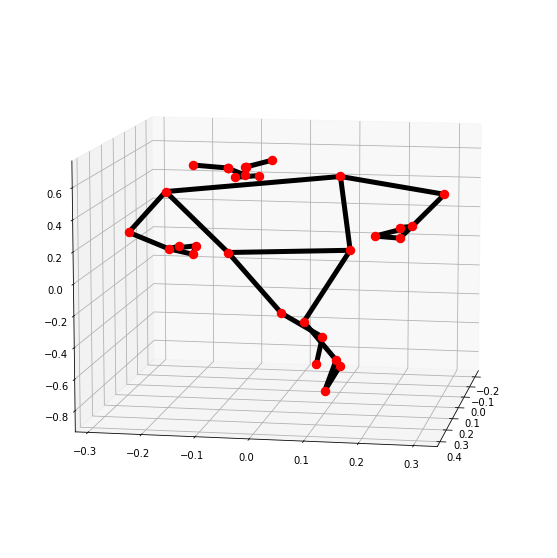

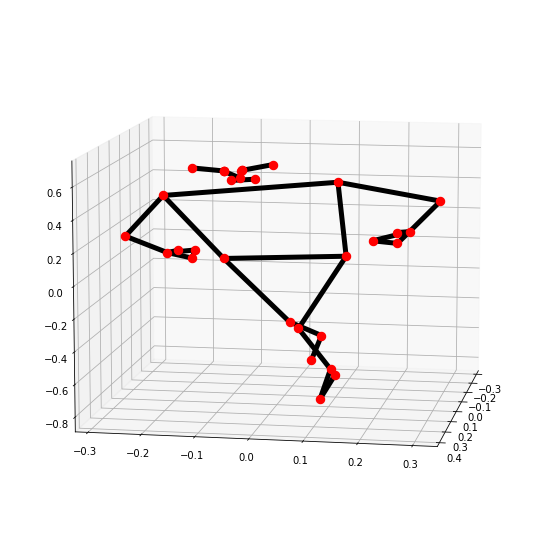

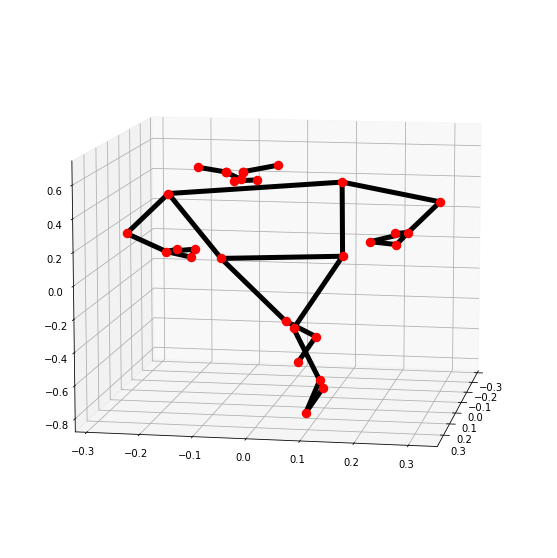

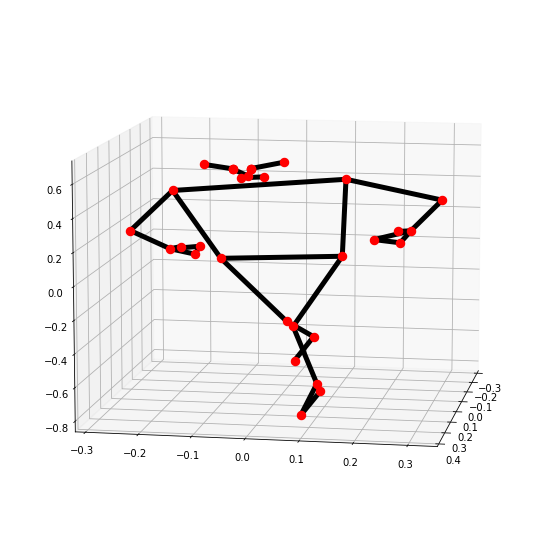

In [9]:
cap = cv2.VideoCapture('D:\\AI_Project\\bowling_analysis\\data\\3.mp4')
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        bg = cv2.imread("data/bg.jpg")
        bg=cv2.resize(bg,(406, 720)) 

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        #mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                #mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                #mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) )  
                                # 
           
        
        final_image = Detected_and_draw(frame,(12,13,14))
        
        cv2.imshow('OpenCV Feed',image)
        

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
        

In [ ]:
cap = cv2.VideoCapture('D:\\AI_Project\\bowling_analysis\\data\\3.mp4')
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        bg = cv2.imread("data/bg.jpg")
        bg=cv2.resize(bg,(406, 720)) 

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            shoulder1 = (landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y)
            elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            elbow1 = (landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y)
            wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
           
        
        # Render detections
        mp_drawing.draw_landmarks(bg, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                )     
        
        mp_drawing.draw_landmarks(frame,results.mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                )
        cv2.imshow('OpenCV Feed',hconcat_resize([frame,bg])) 
        

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()